In [21]:
# library imports
import sys, math, os
import numpy as np
from numpy import abs, log, rot90, hstack, fft, copy, vstack, ones, zeros, invert, unique, uint8, uint
from numpy.fft import fftshift, fft2
from skimage import io, util, color, data, filters, img_as_ubyte, transform, img_as_float, exposure
from skimage.color import rgb2lab, rgb2hsv, hsv2rgb, lab2rgb, rgb2gray
from skimage.io import imread, imshow
import matplotlib.pyplot as plt
from scipy.ndimage import filters, sobel
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte
from collections import defaultdict
from scipy import misc

# Q3

## Part 1

244
28
25
75
35


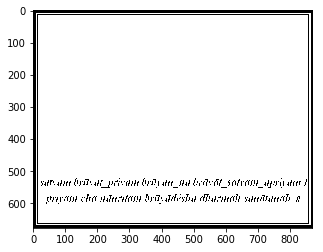

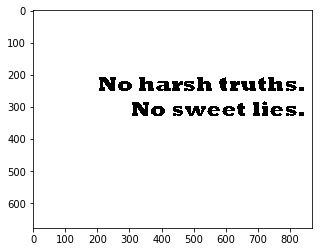

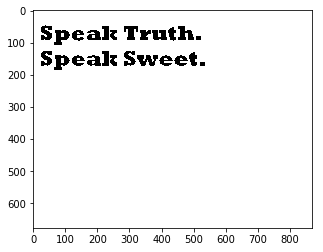

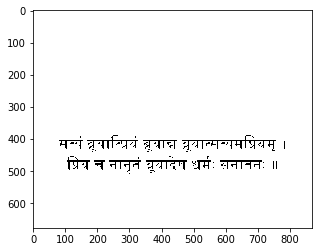

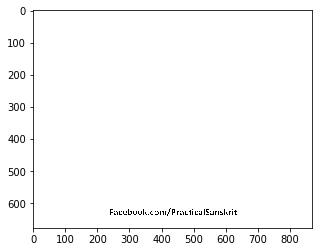

In [25]:
def neighbouring_pixels(img, L, i, j):
    neighbours = []
    labels = []
    if i - 1 >= 0 and j + 1 < img.shape[1]:
        if img[i - 1, j + 1] == 255:
            
            labels.append(L[i - 1, j + 1])
            neighbours.append(img[i - 1, j + 1])
            
    if i - 1 >= 0 and j - 1 >= 0:
        if img[i - 1, j - 1] == 255:
            
            labels.append(L[i - 1, j - 1])
            neighbours.append(img[i - 1, j - 1])
            
    if i - 1 >= 0:
        if img[i - 1, j] == 255:
            
            labels.append(L[i - 1, j])
            neighbours.append(img[i - 1, j])
    
    if j - 1 >= 0:
        if img[i, j - 1] == 255:
            
            labels.append(L[i, j - 1])
            neighbours.append(img[i, j - 1])
    
    return labels, neighbours

class Disjoint_Set_Union:
    
    def __init__(self):
        self.parent = {}
        
    def union(self, x, y): 
        
        x_set = self.find_parent(x) 
        y_set = self.find_parent(y)
        
        if x_set != y_set:
            self.parent[x_set] = y_set 
            
    def find_parent(self, i): 
        if self.parent[i] == -1: 
            return i 
        if self.parent[i] != -1: 
            return self.find_parent(self.parent[i])

def Connected_Components_Labelling(img):
    
    X = img.shape[0]
    Y = img.shape[1]
    
    next_label = 1 
    labels = zeros((X, Y), dtype=uint)
    
    dsu = Disjoint_Set_Union()
       
    for row in range(X):
        for column in range(Y):
            
            if img[row, column] == 255:
                
                neighbours_labels, neighbours = neighbouring_pixels(img, labels, row, column)
                    
                if len(neighbours) != 0:
                    labels[row, column] = min(neighbours_labels)
                    for label in neighbours_labels:
                        dsu.union(label, labels[row, column])

                else:    
                    dsu.parent[next_label] = -1
                    labels[row, column] = next_label
                    next_label += 1
                        
    for row in range(X):
        for column in range(Y):
            
            if img[row, column] != 0:
                labels[row, column] = dsu.find_parent(labels[row][column])

    unique_labels = unique(labels).tolist()
    
    return len(unique_labels), labels

comp = imread('./images/languages.png')

colors = [[0, 0, 0], 
          [31, 73, 125], 
          [255, 0, 0], 
          [0, 176, 80], 
          [112, 48, 160]]

imgs = []
for color in colors:
    A = comp.shape[0]
    B = comp.shape[1]
    
    img_color = zeros((A, B), dtype=uint8)
    
    for i in range(A):
        for j in range(B):
            
            if comp[i, j, :].tolist() == color:
                img_color[i, j] = 255
    imgs.append(img_color)

for img in imgs:
    n, epl = Connected_Components_Labelling(img)
    print(n)
    
    plt.figure()
    plt.imshow(invert(img), cmap="gray")

## Part 2

In [16]:
hindi = imread("./images/hindi.jpg")
telugu = imread("./images/telugu.jpeg")
tamil = imread("./images/tamil.jpeg")

### Sub part a) : Letters enclosing one empty region

In [ ]:
comp = imread('./images/languages.png')

colors = [[0, 0, 0], 
          [31, 73, 125], 
          [255, 0, 0], 
          [0, 176, 80], 
          [112, 48, 160]]

imgs = []
for color in colors:
    A = comp.shape[0]
    B = comp.shape[1]
    
    img_color = zeros((A, B), dtype=uint8)
    
    for i in range(A):
        for j in range(B):
            
            if comp[i, j, :].tolist() == color:
                img_color[i, j] = 255
    imgs.append(img_color)

for img in imgs:
    n, epl = Connected_Components_Labelling(img)
    print(n)
    
    plt.figure()
    plt.imshow(invert(img), cmap="gray")

### Sub part b): Letters enclosing two empty regions

In [ ]:
comp = imread('./images/languages.png')

colors = [[0, 0, 0], 
          [31, 73, 125], 
          [255, 0, 0], 
          [0, 176, 80], 
          [112, 48, 160]]

imgs = []
for color in colors:
    A = comp.shape[0]
    B = comp.shape[1]
    
    img_color = zeros((A, B), dtype=uint8)
    
    for i in range(A):
        for j in range(B):
            
            if comp[i, j, :].tolist() == color:
                img_color[i, j] = 255
    imgs.append(img_color)

for img in imgs:
    n, epl = Connected_Components_Labelling(img)
    print(n)
    
    plt.figure()
    plt.imshow(invert(img), cmap="gray")